<a href="https://colab.research.google.com/github/Paloma-Moya-Tudela/AA_PRACTICA2_GRUPO_2/blob/main/A_PRACTICA2_GRUPO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRUPO 2**

María García Rodríguez

Paloma Moya Tudela

Sofía Peña González

Elena Peral Pastor



# RESUMEN

# ÍNDICE



*   Introducción
*   Resolución
*   Conclusiones
*   Reflexiones
*   Referencias Bibliográficas







# INTRODUCCIÓN

# RESOLUCIÓN

El primer paso será comprender el enunciado y extraer los datos que se nos aportan.

**PROBLEMA:**

* Reconocer y clasificar imágenes de ropa - en escala de grises - en sus diferentes tipologías (10). Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
* Crear un modelo de Red de Neuronas COnvolucionales en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST - precargado en Keras - y que ya se ha utilizado para la 'Prática 1'.
* Se dispone de 70k imágenes del conjunto de datos de Fashion-MNIST en baja resolución (28 x 28 píxeles): artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. Se usarán 60K imágenes para el entrenamiento de la red, y 10K imágenes para evaluar la precisión con la que la red aprende a clasificarlas.


Una vez se tienen claro los materiales con los que se trabajará, se podrá empezar a incorporar código. Sin embargo, antes de comenzar importemnos qyuras y el resto de librerías necesarias para la red neuronal, asegurando que es la versión 2.0.0 (o superior) de TensorFlow.


**DISEÑO, ENTRENAMIENTO Y TEST DE UN SISTEMA DE REDES DE NEURONAS ARTIFICIALES**


In [ ]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


A continuación, cargamos el conjunto de datos  MNIST en Keras con el que vamos a trabajar en esta prática.


In [ ]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import mnist

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Al cargar el set de datos retorna cuatro arreglos en NumPy:
- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
- Las imágenes están **codificadas** como matrices `Numpy`, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1) 

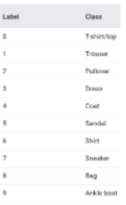

Como los `Class names` no están incluidos los podremos a mano en el siguiente código: 

In [ ]:
nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Una vez tenemos los datos preparados, se puede proceder a revisar los **datos de entrenamiento**.

## Pre-procesamiento del set de datos

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Esto nos indica que el 'Dataset' de los **datos de entrenamiento** contiene 60K imágenes de 28x28, tal y como indica el enunciado. Hagamos lo mismo con los datos correspondientes a las imágenes de 'test':


In [ ]:
print(test_images.shape)

(10000, 28, 28)


De esta manera, apreciamos que se trata de un array de 10K imágenes de 28x28.


A continución, veamos las imágenes de otra forma. Por ejemplo, representemos la matriz de la imagen correspondiente a la posición 0 del array de las imágenes de entrenamiento:

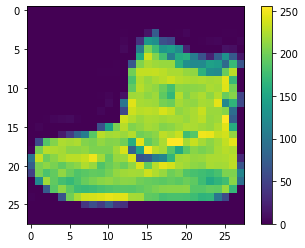

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Una vez se han comprobado las dimensiones de los arrays que se necesitarán, y se tiene clara la estructura de los datos de entrada, nos encontramos con un problema: se observa que los valores oscilan en un rango entre 0 y 250. Sin embargo, si se desea aplicarlos a la red neuronal convolucional, deben ser transformados a valores entre 0 y 1. De esta forma, nos aseguramos de que los datos de entrenamiento y de test se hayan normalizado, y puedan ser porcesados de la misma manera. Arreglémoslo de la siguiente forma:

In [ ]:
# 3.- NORMALIZACIÓN DE LOS DATOS (IMÁGENES DE ENTRENAMIENTO Y DE TEST)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
print (train_images.shape)
print (train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


Volvamos a mostrar la imagen anterior. Esta vez, los valores se presentarán en el rango [0,1], debido a la normalización de los datos previamente realizada:

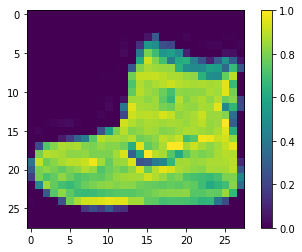

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

A su vez, existe la posibilidad de visalizar las imágenes en su forma matricial. Utilicemos como ejemplo la imagen correspondiente a la posición 2000 del array de los datos de entrenamiento.



In [ ]:
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[20000]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

Simula la silueta de un 'sneaker'; así que, comprobémoslo con su correspondiente imagen asociada. Cabe destacar que observamos que los valores seguirán estando entre 0 y 1:

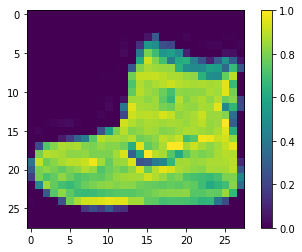

In [ ]:
plt.figure()
plt.imshow(train_images[2000])
plt.colorbar()
plt.grid(False)
plt.show()

Por último, antes de comenzar con la red neuronal convolucional, incluimos una representación de los 10 primeros elementos con sus correspondientes etiquetas. De esta forma, nos aseguramos de que el 'Dataset' sea correcto.

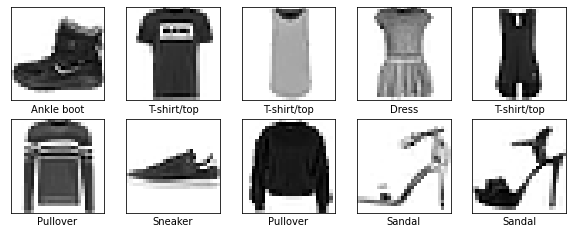

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(nombres[train_labels[i]])
plt.show()

## Configuración de los casos

***1. Configurar y entrenar los siguientes modelos de red de neuronas convolucionales, analizando y reflexionando sobre los resultados.***

**Caso 1**

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1.add(Flatten()) # Capa Flatten

model1.add(Dense(10, activation='softmax')) # Última capa densa

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1.compile(loss=sparse_categorical_crossentropy,
               optimizer=sgd,
               metrics=['accuracy'])

history = model1.fit

model1.fit(train_images, train_labels,
           epochs=5)

#test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

**Caso 2**

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model2.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2.add(Conv2D(128, (3, 3), activation='relu')) # 2ª capa convolucional
model2.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2.add(Flatten()) # Capa Flatten

model2.add(Dense(65,activation='relu')) # Penúltima capa densa
model2.add(Dense(10, activation='softmax')) # Última capa densa

In [ ]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2.compile(loss=sparse_categorical_crossentropy,
               optimizer=sgd,
               metrics=['accuracy'])

history = model2.fit

model2.fit(train_images, train_labels,
           epochs=5)

#test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

**Caso 3**

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model3.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3.add(Conv2D(128, (3, 3), activation='relu')) # 2ª capa convolucional
model3.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3.add(Flatten()) # Capa Flatten

model3.add(Dense(65,activation='relu')) # Penúltima capa densa
model3.add(Dense(10, activation='softmax')) # Última capa densa

In [ ]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3.compile(loss=sparse_categorical_crossentropy,
               optimizer=adam,
               metrics=['accuracy'])

history = model3.fit

model3.fit(train_images, train_labels,
           epochs=5)

#test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

## Salidas

***2. Explicar la salida de la llamada model.summary() de cada uno de los 3 casos.***

In [ ]:
model1.summary()

In [ ]:
model2.summary()

In [ ]:
model3.summary()

##Análisis

###Análisis (5 épocas vs 25 épocas)

***3. Analizar e interpretar los resultados del Caso 1 frente a su original si se multiplica por 5 las épocas de entrenamiento (25).***

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1b = Sequential()
model1b.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1b.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1b.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1b.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1b.add(Flatten()) # Capa Flatten

model1b.add(Dense(10, activation='softmax')) # Última capa densa

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1b.compile(loss=sparse_categorical_crossentropy,
                optimizer=sgd,
                metrics=['accuracy'])

history = model1b.fit

model1b.fit(train_images, train_labels,
            epochs=25)

test_loss1b, test_acc1b = model1b.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

###Análisis (ReLU vs tanh)

***4. Analiza el resultado del Caso 1 si en lugar de 'ReLU' usas 'tanh' en la función de activación de las dos capas convolucionales.***

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1c = Sequential()
model1c.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1c.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1c.add(Conv2D(64, (5, 5), activation='tanh')) # 2ª capa convolucional
model1c.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1c.add(Flatten()) # Capa Flatten

model1c.add(Dense(10, activation='softmax')) # Última capa densa

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1c.compile(loss=sparse_categorical_crossentropy,
                optimizer=sgd,
                metrics=['accuracy'])

history = model1b.fit

model1c.fit(train_images, train_labels,
            epochs=5)

test_loss1c, test_acc1c = model1c.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

## Comparación de rendimiento

***5. Evaluar cada uno de los 3 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba***

In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
#test_labels = to_categorical(test_labels)
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#print('test_loss8:', test_loss ,'test_acc8:', test_acc)  Con esto se muestran más decimales

313/313 [==============================] - 1s 4ms/step - loss: 22.6539 - accuracy: 0.7288


## Predicciones

***6. Usar cada uno de los 3 modelos para hacer predicciones sobre la 6ª imagen de test (test_images[5]).***

Para comenzar, visualicemos de qué trata la 'Imagen 6':

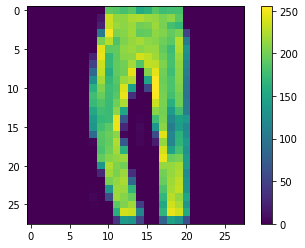

In [ ]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Observamos que parece ser un pantalón, que corresponde a la 'Categoría 1' de nuestra clasificación: 'Trouser'.

**Caso 1**

In [ ]:
prediction1 = model1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction1[5]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [ ]:
np.argmax(prediction1[5])

0

**Caso 2**

In [ ]:
prediction2 = model2.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction2[5]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [ ]:
np.argmax(prediction2[5])

0

**Caso 3**

In [ ]:
prediction3 = model3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction3[5]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [ ]:
np.argmax(prediction3[5])

0

## Gráficas


***7. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 3 casos con las 14 primeras imágenes del conjunto de test. Reflexione y comente las diferencias que observa.***

En las gráficas se verán los siguientes colores:

- azul = valores menores del las otras prediciones

- rojo = el valor interpretadopor el modelo
- negro = el valor de la categoría real

Incluimos las funciones necesarias en los siguientes códigos:

In [ ]:
# PRIMERA FUNCIÓN:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# SEGUNDA FUNCIÓN:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

**Caso 1**

In [ ]:
for i in range(13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction1[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, prediction1[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 2**

In [ ]:
for i in range(13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction2[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, prediction2[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 3**

In [ ]:
for i in range(13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction3[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, prediction3[i],  test_labels)
  plt.show()
  plt.clf()

## Comparativa con la Práctica 1


***8. Hacer comparativa con los resultados que obtuvisteis en la práctica 1, con las
capas Dense.***

##Mejoras del modelo

###1ª Mejora del modelo

***9. Ver los conceptos de 'batch_normalization' y 'dropout'; y ver si se podría mejorar
el modelo con ello.
https://keras.io/api/layers/normalization_layers/batch_normalization/
https://keras.io/api/layers/regularization_layers/dropout/***

###2ª Mejora del modelo

***9. Ver los conceptos de 'callbacks' (Decaimiento del ratio de aprendizaje); y ver si se
podría mejorar el modelo con ello.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Learning
RateScheduler y https://keras.io/api/callbacks/***

# CONCLUSIONES

# REFLEXIONES

## 1.   Cómo hemos afrontado la solución de la práctica





## 2.   Cómo se ha dividido el trabajo

## 3.   Cómo se ha gestionado el equipo para trabajar

# REFERENCIAS BIBLIOGRÁFICAS

- Apuntes recogidos de GitHub y GoogleColab, a raíz de los contenidos estudiados en el aula